In [1]:
#Import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [2]:
#Đọc dữ liệu
data = pd.read_csv('Laptop_dxl.csv')
data

,Thương hiệu,Tên sp,Giá,Tên khách hàng,Rating,Hài lòng,Đánh giá,RAM,Loại RAM,Tốc độ Bus RAM,...,Kết nối không dây,Webcam,Đèn bàn phím,Chất liệu,Thông tin Pin,Hệ điều hành,Thời điểm ra mắt,Dài(mm),Rộng(mm),Trọng Lượng(kg)
0,Acer,Laptop Acer Aspire 3 A314 42P R3B3 R7 5700U/16...,12490000.0,Pham Dung,1.0,1.0,Máy để chế độ sleep khoảng 12 tiếng sẽ bị nóng...,16 GB,LPDDR4X (Onboard),4266 MHz,...,Wi-Fi 6 (802.11ax),HD webcam,Không có đèn,Vỏ nhựa,"3-cell, 50Wh",Windows 11 Home SL,2024.0,318.2,225.5,1.4
1,Acer,Laptop Acer Aspire 3 A314 42P R3B3 R7 5700U/16...,12490000.0,Lê Văn Đối,1.0,1.0,Mua sản phẩm vào tháng 09/2024 đến tháng 02/20...,16 GB,LPDDR4X (Onboard),4266 MHz,...,Wi-Fi 6 (802.11ax),HD webcam,Không có đèn,Vỏ nhựa,"3-cell, 50Wh",Windows 11 Home SL,2024.0,318.2,225.5,1.4
2,Acer,Laptop Acer Aspire 3 A314 42P R3B3 R7 5700U/16...,12490000.0,Long Hoang,5.0,1.0,trong tâm gia nay thi ryzen 7 5800u đap ưng qu...,16 GB,LPDDR4X (Onboard),4266 MHz,...,Wi-Fi 6 (802.11ax),HD webcam,Không có đèn,Vỏ nhựa,"3-cell, 50Wh",Windows 11 Home SL,2024.0,318.2,225.5,1.4
3,Acer,Laptop Acer Aspire 3 A314 42P R3B3 R7 5700U/16...,12490000.0,Hải Đăng,3.0,1.0,không có gì nổi trội hết,16 GB,LPDDR4X (Onboard),4266 MHz,...,Wi-Fi 6 (802.11ax),HD webcam,Không có đèn,Vỏ nhựa,"3-cell, 50Wh",Windows 11 Home SL,2024.0,318.2,225.5,1.4
4,Acer,Laptop Acer Aspire 3 A314 42P R3B3 R7 5700U/16...,12490000.0,Nguyễn Huy Tuấn,4.0,1.0,Mới mua con này hôm 23/9 mà hôm sau giá giảm t...,16 GB,LPDDR4X (Onboard),4266 MHz,...,Wi-Fi 6 (802.11ax),HD webcam,Không có đèn,Vỏ nhựa,"3-cell, 50Wh",Windows 11 Home SL,2024.0,318.2,225.5,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,Asus,Laptop Asus Gaming Vivobook K3605ZF-RP634W i5-...,16990000.0,Anh Ý,5.0,1.0,"Máy có cấu hình cao, độ mỏng chỉ 1,89cm thuận ...",16 GB,DDR4 (Onboard),3200 MHz,...,Wi-Fi 6E (802.11ax),HD webcam,Đơn sắc - Màu trắng,Vỏ nhựa - nắp lưng bằng kim loại,"3-cell, 50Wh",Windows 11 Home SL,2024.0,358.6,249.1,1.8
789,Asus,Laptop Asus Gaming Vivobook K3605ZF-RP634W i5-...,16990000.0,HIỆP,5.0,1.0,Máy có màn hình khá đẹp với tầng số quét chuẩn...,16 GB,DDR4 (Onboard),3200 MHz,...,Wi-Fi 6E (802.11ax),HD webcam,Đơn sắc - Màu trắng,Vỏ nhựa - nắp lưng bằng kim loại,"3-cell, 50Wh",Windows 11 Home SL,2024.0,358.6,249.1,1.8
790,Asus,Laptop Asus Gaming Vivobook K3605ZF-RP634W i5-...,16990000.0,Xuân Khánh,1.0,0.0,"Sản phẩm dùng ổn, nhưng thời gian giao hàng hơ...",16 GB,DDR4 (Onboard),3200 MHz,...,Wi-Fi 6E (802.11ax),HD webcam,Đơn sắc - Màu trắng,Vỏ nhựa - nắp lưng bằng kim loại,"3-cell, 50Wh",Windows 11 Home SL,2024.0,358.6,249.1,1.8
791,Asus,Laptop Asus Gaming Vivobook K3605ZF-RP634W i5-...,16990000.0,Dũng,5.0,0.0,Laptop văn phòng nhưng dược trang bị thêm card...,16 GB,DDR4 (Onboard),3200 MHz,...,Wi-Fi 6E (802.11ax),HD webcam,Đơn sắc - Màu trắng,Vỏ nhựa - nắp lưng bằng kim loại,"3-cell, 50Wh",Windows 11 Home SL,2024.0,358.6,249.1,1.8


In [3]:
data = data.drop(columns=['Tên khách hàng'], errors='ignore')
data['Hài lòng'] = data['Hài lòng'].astype('int64')
data['Giá'] = data['Giá'].astype('int64')
data['Thời điểm ra mắt'] = data['Thời điểm ra mắt'].astype('int64')

In [4]:
#Chuyển đổi dữ liệu
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [5]:
#Lấy cột cho phân cụm
corr = data.corr()
cols = corr['Hài lòng'].abs()[corr['Hài lòng'].abs() > 0.05].index
kmean = data[cols]
kmean.head()

,Giá,Rating,Hài lòng,RAM,Loại RAM,Tốc độ Bus RAM,Hỗ trợ RAM tối đa,Ổ cứng,Công nghệ CPU,Số nhân,Tốc độ CPU,Card màn hình,Cổng giao tiếp,Kết nối không dây,Thông tin Pin,Thời điểm ra mắt
0,12490000,1.0,1,0,15,3,8,7,3,8,4,14,1,4,10,2024
1,12490000,1.0,1,0,15,3,8,7,3,8,4,14,1,4,10,2024
2,12490000,5.0,1,0,15,3,8,7,3,8,4,14,1,4,10,2024
3,12490000,3.0,1,0,15,3,8,7,3,8,4,14,1,4,10,2024
4,12490000,4.0,1,0,15,3,8,7,3,8,4,14,1,4,10,2024


In [6]:
kmean.shape

(793, 16)

In [7]:
#Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(kmean)

In [8]:
data_scaled

array([[-0.90090523, -2.32164825,  0.82683239, ...,  0.05729981,
        -0.26645295,  1.39496102],
       [-0.90090523, -2.32164825,  0.82683239, ...,  0.05729981,
        -0.26645295,  1.39496102],
       [-0.90090523,  0.81742603,  0.82683239, ...,  0.05729981,
        -0.26645295,  1.39496102],
       ...,
       [-0.09155205, -2.32164825, -1.20943496, ...,  1.05595364,
        -0.26645295,  1.39496102],
       [-0.09155205,  0.81742603, -1.20943496, ...,  1.05595364,
        -0.26645295,  1.39496102],
       [-0.09155205,  0.81742603, -1.20943496, ...,  1.05595364,
        -0.26645295,  1.39496102]])

In [17]:
#Tìm số cụm k
from sklearn.cluster import KMeans
from sklearn import metrics

inertias = []
silhouette_scores=[]
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)
    
    silhouette_score=metrics.silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_score)

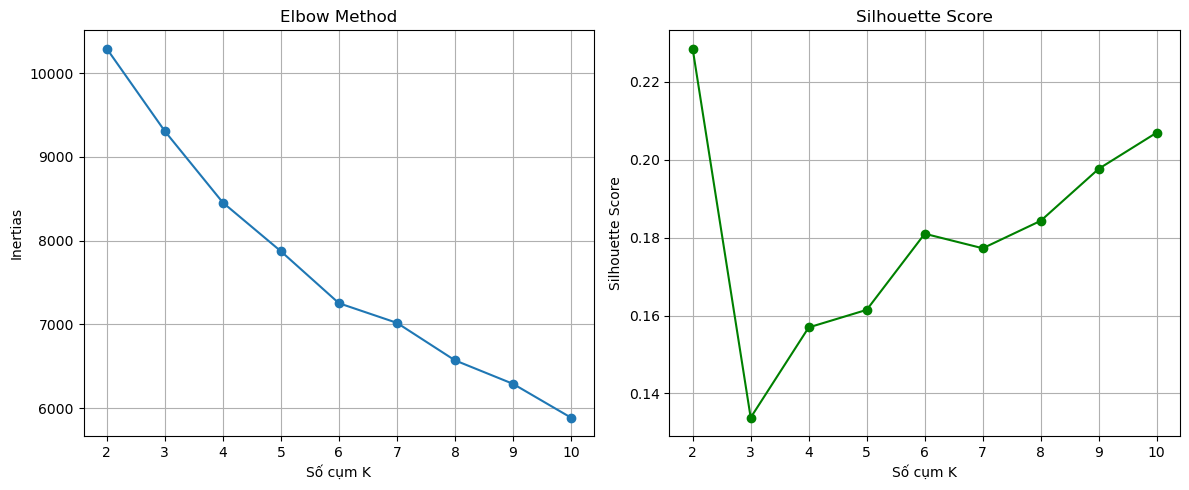

In [18]:
#Vẽ biểu đồ Elbow và Silhouette
plt.figure(figsize=(12, 5))

# Biểu đồ Elbow Method
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Số cụm K')
plt.ylabel('Inertias')
plt.grid(True)

# Biểu đồ Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Số cụm K')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

In [19]:
#Phân cụm và đưa ra đặc điểm các cụm
kmeans=KMeans(n_clusters=6, random_state=42)
kmeans.fit(data_scaled)
data['Cluster']=kmeans.labels_

cluster_centers=scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df=pd.DataFrame(cluster_centers, columns=['Giá', 'Rating', 'Hài lòng', 'RAM', 'Loại RAM', 'Tốc độ Bus RAM', 
                                                  'Hỗ trợ RAM tối đa', 'Ổ cứng', 'Công nghệ CPU', 'Số nhân', 'Tốc độ CPU', 
                                                  'Card màn hình', 'Cổng giao tiếp', 'Kết nối không dây', 'Thông tin Pin',
                                                  'Thời điểm ra mắt'])
print('Đặc điểm các cụm:')
print(cluster_df)

cluster_counts=pd.Series(kmeans.labels_).value_counts().sort_index()
print('Số điểm trong mỗi cụm:')
print(cluster_counts)

Đặc điểm các cụm:
            Giá    Rating  Hài lòng           RAM   Loại RAM  Tốc độ Bus RAM  \
0  1.721696e+07  3.637255  0.627451 -1.110223e-15   6.147059        1.553922   
1  1.310168e+07  3.948598  0.425234  3.000000e+00   5.313084        1.985981   
2  1.948205e+07  4.173516  0.666667  9.726027e-01   8.178082        2.867580   
3  3.119455e+07  4.159091  0.613636  6.136364e-01  16.772727        6.431818   
4  1.369417e+07  3.944444  0.763889  2.500000e-01  16.708333        4.875000   
5  2.339000e+07  4.275000  0.600000  1.500000e+00  14.000000       11.000000   

   Hỗ trợ RAM tối đa    Ổ cứng  Công nghệ CPU    Số nhân  Tốc độ CPU  \
0           1.931373  6.475490      23.348039  10.617647    3.651961   
1           1.317757  6.626168      20.121495   8.747664    2.191589   
2           3.150685  8.607306      20.100457   9.378995   12.242009   
3           7.000000  6.704545      16.181818  14.000000    6.454545   
4           8.000000  7.097222      16.777778   6.083333   10

In [20]:
#Chỉ số của k-means
from sklearn.metrics import silhouette_score

wss=kmeans.inertia_
print('WSS:', wss)

centroids=kmeans.cluster_centers_
mean=data_scaled.mean(axis=0)
bss=((centroids - mean)**2).sum()
print('BSS:', bss)

silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print('Silhouette Score:', silhouette_avg)

WSS: 7253.457904290316
BSS: 71.18460165424494
Silhouette Score: 0.18100574718686305


In [21]:
#Ánh xạ lại dữ liệu
print("ÁNH XẠ LABEL ENCODING CHO CÁC CỘT ĐÃ CHỌN\n")
selected_col = ['RAM', 'Loại RAM', 'Tốc độ Bus RAM', 
                'Hỗ trợ RAM tối đa', 'Ổ cứng', 'Công nghệ CPU', 'Tốc độ CPU', 
                'Card màn hình', 'Cổng giao tiếp', 'Kết nối không dây', 'Thông tin Pin']
for col in selected_col:
    if col in label_encoders:
        le = label_encoders[col]
        print(f"--- Mapping cho cột '{col}':")
        for i, label in enumerate(le.classes_):
            print(f"{i} → {label}")
        print("\n")
    else:
        print(f"Cột '{col}' không có trong label_encoders.\n")

ÁNH XẠ LABEL ENCODING CHO CÁC CỘT ĐÃ CHỌN

--- Mapping cho cột 'RAM':
0 → 16 GB
1 → 24 GB
2 → 32 GB
3 → 8 GB


--- Mapping cho cột 'Loại RAM':
0 → DDR4 (Onboard 4 GB + 1 khe 4 GB)
1 → DDR4 (Onboard)
2 → DDR4 2 khe (1 khe 16 GB + 1 khe 16 GB)
3 → DDR4 2 khe (1 khe 16 GB + 1 khe rời)
4 → DDR4 2 khe (1 khe 4 GB + 1 khe 4 GB)
5 → DDR4 2 khe (1 khe 8 GB + 1 khe 8 GB)
6 → DDR4 2 khe (1 khe 8 GB + 1 khe rời)
7 → DDR4 2 khe (1 khe 8 GB onboard + 1 khe trống)
8 → DDR4 2 khe (8 GB onboard + 1 khe 8 GB)
9 → DDR5 (1 khe RAM)
10 → DDR5 2 khe (1 khe 12 GB + 1 khe 12 GB)
11 → DDR5 2 khe (1 khe 16 GB + 1 khe rời)
12 → DDR5 2 khe (1 khe 8 GB + 1 khe 8 GB)
13 → DDR5 2 khe (1 khe 8 GB + 1 khe trống)
14 → Hãng không công bố
15 → LPDDR4X (Onboard)
16 → LPDDR5
17 → LPDDR5 (Onboard)
18 → LPDDR5X (Onboard)


--- Mapping cho cột 'Tốc độ Bus RAM':
0 → 2666 MHz
1 → 2933 MHz
2 → 3200 MHz
3 → 4266 MHz
4 → 4800 MHz
5 → 5200 MHz
6 → 5500 MHz
7 → 5600 MHz
8 → 6400 MHz
9 → 7467 MHz
10 → 8533 MHz
11 → Hãng không công b